In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
print(x_test.shape)

(10000, 28, 28)


In [7]:
print(y_train.shape)

(60000,)


In [8]:
print(y_test.shape)

(10000,)


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

In [17]:
# cv2.WINDOW_FULLSCREEN

for i in range(0,6):
    random_num = np.random.randint(0,len(x_train))
    img = x_train[random_num]
    cv2.imshow("img",img)
    cv2.resizeWindow("img",(28,28))
    cv2.waitKey(0)
cv2.destroyAllWindows()

## SAME THING USING MATPLOT

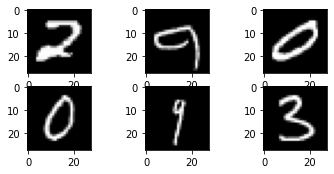

In [24]:
plt.subplot(331)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap= plt.get_cmap('gray'))


plt.subplot(332)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap= plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap= plt.get_cmap('gray'))
plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap= plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap= plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap= plt.get_cmap('gray'))

plt.show()



In [25]:
x_train.shape

(60000, 28, 28)

In [33]:
img_rows = x_train[0].shape[0]

In [34]:
img_cols = x_train[0].shape[1]

In [35]:
print(img_rows)
print(img_cols)

28
28


In [36]:
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [37]:
input_shape = (img_rows,img_cols,1)

In [38]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [39]:
x_train/=255
x_test/=255

In [40]:
x_train.min()

0.0

In [41]:
x_test.min()

0.0

In [42]:
x_train.max()

1.0

In [43]:
x_test.max()

1.0

# ONE-HOT ENCODING

In [44]:
from keras.utils import to_categorical

In [47]:
y_train = to_categorical(y_train)
# y_test =  to_categorical(y_test) #DON'T DO IT!!!!

In [48]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [49]:
y_train.shape

(60000, 10)

In [51]:
y_test.shape

(10000, 10)

In [52]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1]*x_train.shape[2]

In [53]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D

In [54]:
from keras.optimizers import SGD

In [74]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = input_shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


model.compile(optimizer=SGD(0.01),loss='categorical_crossentropy',metrics=['accuracy'])

print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [75]:
# history = model.fit(x_train,y_train,batch_size=256,epochs=10,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
235/235 [==============================] - 67s 285ms/step - loss: 1.3746 - accuracy: 0.5871 - val_loss: 0.4325 - val_accuracy: 0.8780
Epoch 2/10
235/235 [==============================] - 70s 298ms/step - loss: 0.4643 - accuracy: 0.8582 - val_loss: 0.2979 - val_accuracy: 0.9133
Epoch 3/10
235/235 [==============================] - 70s 297ms/step - loss: 0.3693 - accuracy: 0.8869 - val_loss: 0.2497 - val_accuracy: 0.9259
Epoch 4/10
235/235 [==============================] - 70s 298ms/step - loss: 0.3187 - accuracy: 0.9022 - val_loss: 0.2111 - val_accuracy: 0.9373
Epoch 5/10
235/235 [==============================] - 70s 298ms/step - loss: 0.2838 - accuracy: 0.9140 - val_loss: 0.1822 - val_accuracy: 0.9456
Epoch 6/10
235/235 [==============================] - 70s 297ms/step - loss: 0.2623 - accuracy: 0.9210 - val_loss: 0.1627 - val_accuracy: 0.9503
Epoch 7/10
235/235 [==============================] - 70s 297ms/step - loss: 0.2410 - accuracy: 0.9274 - val_loss: 0.1572 - val_ac

In [76]:
score = model.evaluate(x_test,y_test,verbose=0)

In [77]:
score[0]

0.12579748034477234

In [78]:
score[1]

0.9610999822616577

In [79]:
print("TEST LOSS",score[0])
print("TEST ACCURACY", score[1])

TEST LOSS 0.12579748034477234
TEST ACCURACY 0.9610999822616577


In [80]:
import pandas as pd

In [81]:
# losses = pd.DataFrame(model.history.history)

In [82]:
losses = pd.DataFrame(history.history)

In [83]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.374562,0.587117,0.432514,0.8780
1,0.464257,0.858167,0.297868,0.9133
2,0.369256,0.886883,0.249672,0.9259
3,0.318687,0.902167,0.211121,0.9373
4,0.283815,0.914017,0.182175,0.9456
5,0.262311,0.921017,0.162685,0.9503
6,0.241030,0.927367,0.157218,0.9533
7,0.225625,0.931017,0.144573,0.9563
8,0.213976,0.935400,0.134954,0.9576
9,0.205685,0.937150,0.125798,0.9611


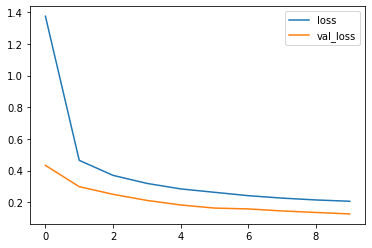

In [85]:
losses[['loss','val_loss']].plot()

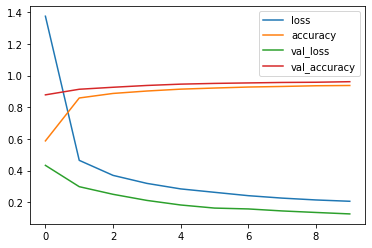

In [86]:
losses.plot()

In [87]:
model.save('Handwritten_model.h5')

In [88]:
from keras.models import load_model

In [89]:
# classifier = load_model('Handwritten_model.h5')

In [90]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [92]:
predictions[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [93]:
from sklearn import metrics

In [99]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.96      0.95      0.95       892
           6       0.95      0.97      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.94      0.95      0.95       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [100]:
print(metrics.accuracy_score(y_test,predictions))

0.9611


In [102]:
# classifier.predict_classes(x_test[0])